In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [3]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(
    root="./data/", train=True, transform=trans, download=True
)
mnist_test=torchvision.datasets.FashionMNIST(
    root="./data/", train=False, transform=trans, download=True
)

100.0%


Extracting ./data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\raw



100.0%


Extracting ./data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\raw



100.0%


Extracting ./data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\raw



100.0%

Extracting ./data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\raw



In [5]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [9]:
def get_fashion_mnist_labels(labels):
    test_labels=['t-shirt', 'trouser','pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [test_labels[int(i)] for i in labels]

In [33]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize=(num_cols*scale, num_rows*scale)
    _, axes=d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes=axes.flatten()
    for i, (ax, img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'coat'}>], dtype=object)

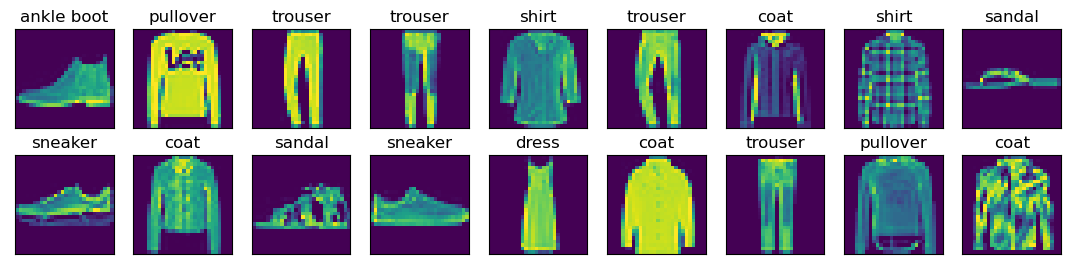

In [38]:
X,y = next(iter(data.DataLoader(mnist_test, batch_size=18)))
show_images(X.reshape(18,28,28), 2, 9, titles=get_fashion_mnist_labels(y))

In [40]:
batch_size=256
def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [41]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'7.22 sec'

In [44]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data/", train=True, transform=trans,download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data/", train=False, transform=trans, download=True
    )
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))
    
    

In [48]:
train_iter, test_iter=load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
